In [2]:
import numpy as np
import numpy.ma as ma
import argparse
import sys
sys.path.append("./utils/")
import operator_calculations as op_calc
import delay_embedding as embed
import stats
from scipy.interpolate import UnivariateSpline
from multiprocessing import Pool,cpu_count
import pickle
import h5py
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.io import loadmat

In [3]:
ratio = np.linspace(.25,2,10)
idx=0
f = h5py.File('../data/Poisson/sims_fpts_be/dts_{}.h5'.format(idx),'r')
Tx = np.array(f['Tx'])[0]
mu_s = np.array(f['mu_s'])[0]
maxT = np.array(f['maxT'])[0]
f.close()
Ts_range = ratio*Tx

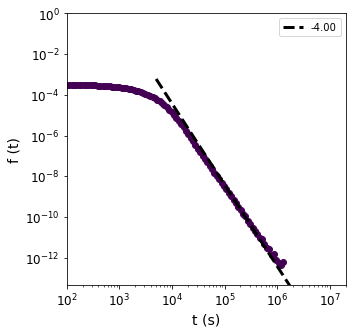

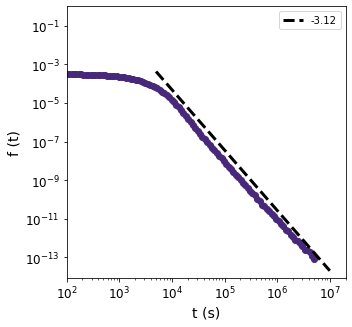

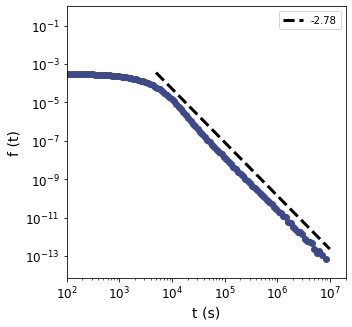

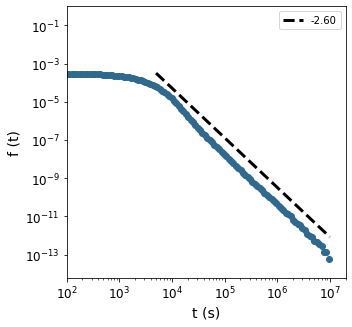

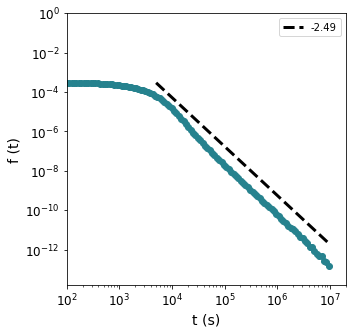

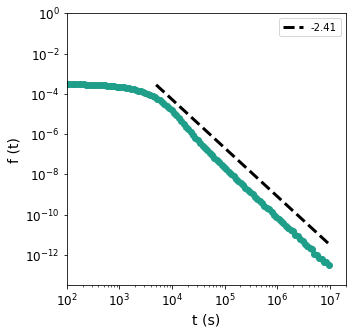

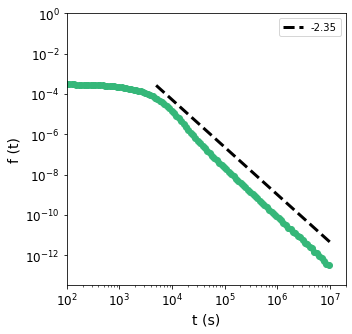

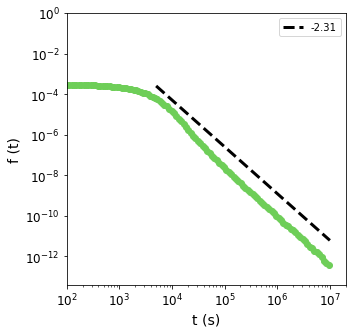

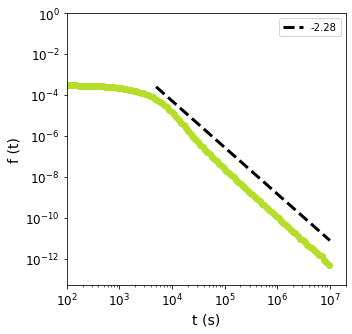

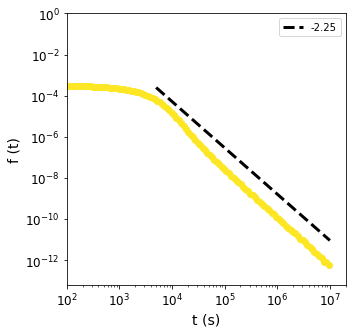

In [4]:
colors_Ts = plt.cm.viridis(np.linspace(0,1,len(Ts_range)))

for idx in range(len(Ts_range)):
    Ts = Ts_range[idx]
    f = h5py.File('../data/Poisson/sims_fpts_be/fptd_{}.h5'.format(idx),'r')
    freqs = np.array(f['freqs'])
    centers_t = np.array(f['centers_t'])
    bins = np.array(f['bins'])
    f.close()
    
    db = np.array(np.diff(bins), float)
    prob = freqs/db/freqs.sum()
    sel = freqs>5
    prob = prob[sel]
    
    plt.figure(figsize=(5,5))
    plt.plot(centers_t[sel],prob,marker='o',lw=0,c=colors_Ts[idx])
    xmin=5e3
    trange = np.logspace(np.log10(xmin),7)
    alpha = 2+Tx/(2*Ts)
    plt.plot(trange,(alpha-1)/xmin*(trange/xmin)**(-alpha),label = '{:.2f}'.format(-alpha),c='k',ls='--',lw=3)
    plt.legend()
    plt.ylim(.1*np.min(prob),1)
    plt.xlim(1e2,2e7)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('t (s)',fontsize=14)
    plt.ylabel('f (t)',fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
#     plt.savefig('fpts_Ts_{:.2f}.pdf'.format(Ts))
    plt.show()

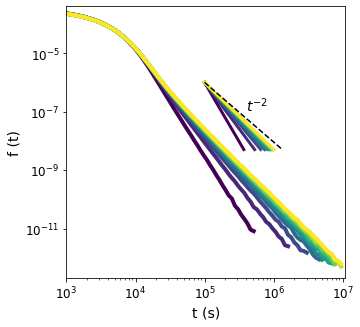

In [5]:

plt.figure(figsize=(5,5))
for idx in range(len(Ts_range)):
    Ts = Ts_range[idx]
    f = h5py.File('../data/Poisson/sims_fpts_be/fptd_{}.h5'.format(idx),'r')
    freqs = np.array(f['freqs'])
    bins = np.array(f['bins'])
    centers_t = np.array(f['centers_t'])
    f.close()
    #normalize density
    db = np.array(np.diff(bins), float)
    prob = freqs/db/freqs.sum()
    sel = freqs>50
    prob = prob[sel]
    
    plt.plot(centers_t[sel],prob,c=colors_Ts[idx],lw=4)
    
    trange = np.logspace(3.5,6)
    plt.ylim(.1*np.min(prob),1)
    # plt.xlim(1e2,5e6)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('t (s)',fontsize=14)
    plt.ylabel('f (t)',fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
# plt.plot(trange,1e3*trange**(-2)*np.log(trange)**(-1/2),c='k',ls='--')
ymax = 1e-6
xmin = 10**5
trange = np.logspace(np.log10(xmin),7.5,1000)
ymin=5e-9
a = ymax*(xmin)**(2)*np.sqrt(np.log(xmin))
y = a*trange**(-2)*np.log(trange)**(-1/2)
sel = y>ymin
plt.plot(trange[sel],y[sel],c='k',ls='--',zorder=10)
for idx in range(len(Ts_range)):
    Ts = Ts_range[idx]
    a = ymax*(xmin)**(2+Tx/(2*Ts))*np.sqrt(np.log(xmin))
    y = a*trange**(-2-Tx/(2*Ts))*np.log(trange)**(-1/2)
    sel = y>ymin
    plt.plot(trange[sel],y[sel],c=colors_Ts[idx],lw=3)
plt.xlim(1e3,1.1e7)
plt.ylim(2e-13,4e-4)
plt.text(4e5,1e-7,r'$t^{{-2}}$',fontsize=14)
# plt.savefig('fptd_all_Poisson_DW_be.pdf')
plt.show()

<ipython-input-6-cbb4a2cb86b2>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


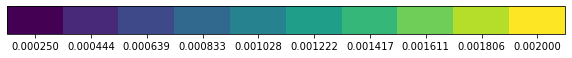

In [6]:
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(10, 1))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.colors.ListedColormap(colors_Ts)
cmap.set_over('0.1')
cmap.set_under('1.0')

bounds =  np.hstack([Ts_range-np.diff(Ts_range)[0]/2,Ts_range[-1]+np.diff(Ts_range)[0]/2])
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb2 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                boundaries=bounds,
                                ticks=Ts_range,
                                spacing='proportional',
                                orientation='horizontal')
# plt.savefig('colorbar_Ts_range.pdf')
fig.show()
